# Comparison of QAOA CVaR (Max Cut)
In this notebook the QAOA method using the Conditional Value at risk (CVaR) is compared to the stadard QAOA for a max cut problem. 
# Importing necessary modules

In [1]:
from qaoa import QAOA, problems, mixers, initialstates

In [2]:
from qiskit import *
import numpy as np
import networkx as nx

import matplotlib.pyplot as pl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from qiskit.visualization import *

# Creating problem instance
Data for graph generation is found at https://github.com/OpenQuantumComputing/data

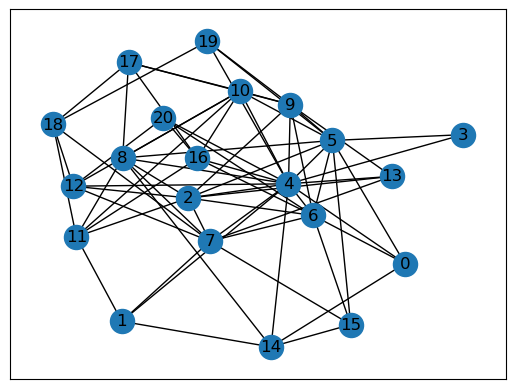

In [3]:
numV=21   #Number of vertices
G = nx.read_gml("../../../data/sample_graphs/w_ba_n"+str(numV)+"_k4_0.gml")
pos = nx.spring_layout(G)
nx.draw_networkx(G,pos=pos)

# Creating QAOA instances 

In [4]:
qaoamc_CVaR = QAOA(
    initialstate=initialstates.Plus(),
    problem=problems.MaxCut(G=G),
    mixer=mixers.X(),
    alpha=0.1
)
qaoamc = QAOA(
    initialstate=initialstates.Plus(),
    problem=problems.MaxCut(G=G),
    mixer=mixers.X()
)

# Minimum cost is precalculated

In [5]:
mincost=-25.23404480588015

# Sampling cost landscape for all methods
Evaluating the QAOA circuit with uniformly sampled angles for gamma and beta, just to see how sampling measurements from the circuits roughly looks like.

In [6]:
qaoamc.sample_cost_landscape(angles={"gamma": [0,np.pi/2,10], "beta": [0,np.pi/2,10]})
qaoamc_CVaR.sample_cost_landscape(angles={"gamma": [0,np.pi/2,10], "beta": [0,np.pi/2,10]})

2023-09-19 12:03:36 [info     ] Calculating energy landscape for depth p=1... file=qaoa.qaoa func=sample_cost_landscape
2023-09-19 12:03:36 [info     ] Executing sample_cost_landscape file=qaoa.qaoa func=sample_cost_landscape
2023-09-19 12:03:36 [info     ] parameters: 2                  file=qaoa.qaoa func=sample_cost_landscape
2023-09-19 12:03:36 [info     ] Done execute                   file=qaoa.qaoa func=sample_cost_landscape
2023-09-19 12:04:42 [info     ] Done measurement               file=qaoa.qaoa func=sample_cost_landscape
2023-09-19 12:04:42 [info     ] Calculating Energy landscape done file=qaoa.qaoa func=sample_cost_landscape
2023-09-19 12:04:42 [info     ] Calculating energy landscape for depth p=1... file=qaoa.qaoa func=sample_cost_landscape
2023-09-19 12:04:42 [info     ] Executing sample_cost_landscape file=qaoa.qaoa func=sample_cost_landscape
2023-09-19 12:04:42 [info     ] parameters: 2                  file=qaoa.qaoa func=sample_cost_landscape
2023-09-19 12:04:42 

# Plotting cost landscape, for both QAOA instances

Below the cost landscape of both the standard QAOA method and the CVaR method is shown. They are seen to be relatively similar, but with some differences as is expected since the cost value is calculated differently for the two methods.

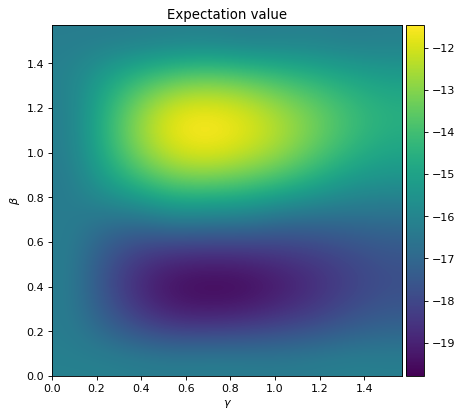

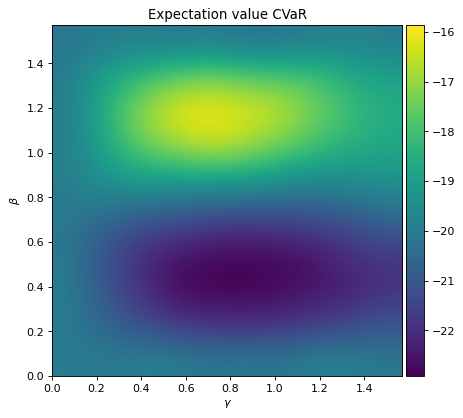

In [7]:
f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Expectation value')
im = ax.imshow(qaoamc.E,interpolation='bicubic',origin='lower',extent=[0,np.pi/2,0,np.pi/2])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)

f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Expectation value CVaR')
im = ax.imshow(qaoamc_CVaR.E,interpolation='bicubic',origin='lower',extent=[0,np.pi/2,0,np.pi/2])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)


# Increasing depth

In [8]:
maxdepth=5
for i in range(maxdepth):
    qaoamc.increase_depth()
    qaoamc_CVaR.increase_depth()

2023-09-19 12:06:18 [info     ] cost(depth 1 = -19.720202184381225 file=qaoa.qaoa func=increase_depth
2023-09-19 12:06:41 [info     ] cost(depth 1 = -23.03674748643805 file=qaoa.qaoa func=increase_depth
2023-09-19 12:07:55 [info     ] cost(depth 2 = -21.350532767240036 file=qaoa.qaoa func=increase_depth
2023-09-19 12:09:15 [info     ] cost(depth 2 = -23.967566414312575 file=qaoa.qaoa func=increase_depth
2023-09-19 12:11:10 [info     ] cost(depth 3 = -22.087266278481486 file=qaoa.qaoa func=increase_depth
2023-09-19 12:13:21 [info     ] cost(depth 3 = -24.348036152980576 file=qaoa.qaoa func=increase_depth
2023-09-19 12:15:14 [info     ] cost(depth 4 = -22.580950449702932 file=qaoa.qaoa func=increase_depth
2023-09-19 12:16:55 [info     ] cost(depth 4 = -24.812251194943514 file=qaoa.qaoa func=increase_depth
2023-09-19 12:19:37 [info     ] cost(depth 5 = -22.821530740642036 file=qaoa.qaoa func=increase_depth
2023-09-19 12:22:36 [info     ] cost(depth 5 = -24.97581825617147 file=qaoa.qaoa fu

# Plotting the approximation ratio

Below the approximation ratio is plotted for both methods. The CVaR method clearly outperforms the standard QAOA method.

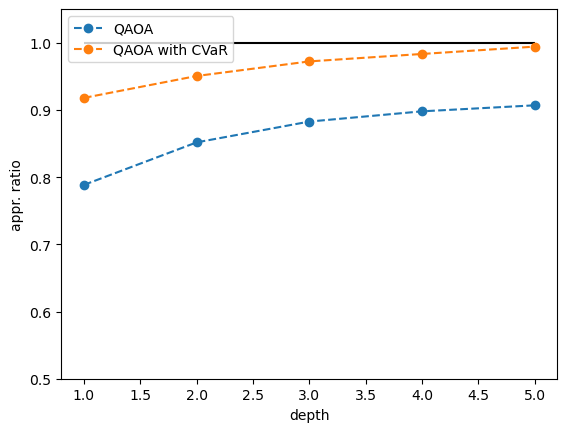

In [9]:
pl.hlines(1, 1,maxdepth, linestyles="solid", colors="black")
pl.plot(np.arange(1,maxdepth+1), np.array(list(qaoamc.costval.values()))/mincost,'o--', label='QAOA')
pl.plot(np.arange(1,maxdepth+1), np.array(list(qaoamc_CVaR.costval.values()))/mincost,'o--', label='QAOA with CVaR')
pl.ylim(0.5,1.05)
_=pl.ylabel('appr. ratio')
_=pl.xlabel('depth')
_=pl.legend()